#### Preparing our imports

In [ ]:
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

#### Implementing the Linear & Logistic Regression logic

In [ ]:
class BaseRegression():
  '''Implementing the Base Regression algorithm.'''
  def __init__(self, lr=0.01, n_iters=1000):
    self.lr = lr
    self.n_iters = n_iters
    self.weights = None
    self.bias = None

  def fit(self, X, y):
    '''training the dataset'''
    # initializing the weights and bias
    n_samples, n_features = X.shape
    self.weights = np.random.rand(n_features)
    self.bias = 0

    # learning Weights
    for _ in range(self.n_iters):
      y_pred = self._approximation(X, self.weights, self.bias)
      dw = (2/n_samples)* np.dot(X.T, (y - y_pred))
      db = (2/n_samples)* np.sum(y - y_pred)

      self.weights += self.lr * dw
      self.bias += self.lr * db

  def predict(self, X):
    '''predicting for the dataset'''
    return self._predict(X, self.weights, self.bias)
    
  def _approximation(self, X, w, b):
    raise NotImplementedError()

  def _predict(self, X, w, b):
    raise NotImplementedError()


###### Linear Regression Class

In [ ]:
class LinearRegression(BaseRegression):  
  def _approximation(self, X, w, b):
    '''Implementing method from Base Class to approximate the output'''
    return np.dot(X, w) + b

  def _predict(self, X, w, b):
    return np.dot(X, w) + b

###### Linear Regression Class

In [ ]:
def sigmoid(x):
  return 1/(1 + np.exp(-x))

class LogisticRegression(BaseRegression):
  def _approximation(self, X, w, b):
    '''Implementing method from Base Class to approximate the output'''
    linear_pred = np.dot(X, w) + b
    return sigmoid(linear_pred)

  def _predict(self, X, w, b):
    y_pred = sigmoid(np.dot(X, w) + b)
    Y_pred_class = [1 if y > 0.5 else 0 for y in y_pred]
    return Y_pred_class

#### Training & Testing the Linear Regressor

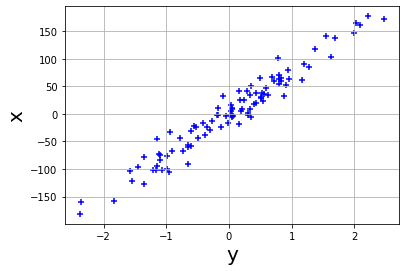

In [ ]:
X, y = datasets.make_regression(n_samples=100, n_features=1, noise=20, random_state=4)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)

plt.scatter(X[:,0], y, color='b', marker='+', s=30)
plt.ylabel('x', size=20)
plt.xlabel('y', size=20)
plt.grid()

360.50753682922266


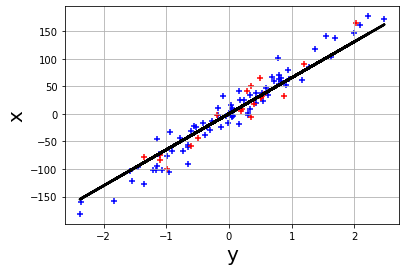

In [ ]:
regressor = LinearRegression(lr=0.001)
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)

def mse(y_pred, y_true):
  return np.mean((y_pred - y_true)**2)

print(mse(y_pred, y_test))
plt.scatter(X_train, y_train, color='b', marker='+', s=30)
plt.scatter(X_test, y_test, color='r', marker='+', s=30)
plt.plot(X, regressor.predict(X), color='k', linewidth=2.5)
plt.ylabel('x', size=20)
plt.xlabel('y', size=20)
plt.grid()

#### Training & Testing the Linear Regressor

In [ ]:
data = datasets.load_breast_cancer()
X, y = data.data, data.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)

def accuracy(y_true, y_pred):
  return np.sum(y_true == y_pred) / len(y_true)

regressor = LogisticRegression(lr=0.001, n_iters=1000)
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)

print("Logistic Regression classification accuracy: ", round(accuracy(y_test, y_pred), 2))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  


Logistic Regression classification accuracy:  0.92


###### Credits: https://www.youtube.com/watch?v=YYEJ_GUguHw